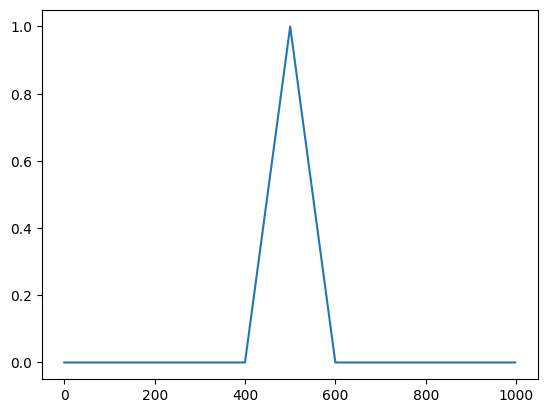

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def funcDiff(x):
    """Function"""
    if x < 400. or x > 600.:
        return 0.
    elif x < 500:
        return 0.01*(x-400.)
    else:
        return 2.0 - 0.01*(x-400.)

dt = 360; k = 0.029; dx = 2
# dboundary = 273.15 # dirichlet boundary
x0 = np.arange(0, 1000+dx, dx)
y0 = np.vectorize(funcDiff)(x0)
# sz = len(x0); y0[0] = dboundary; y0[sz-1] = dboundary
plt.plot(x0, y0)
    

FTCS - Diff

$$
{{\phi_j^{n} -\phi_j^{n-1} }\over {\Delta t}} + u{{\phi_{j+1}^{n} -\phi_{j-1}^{n}}\over {2 \Delta x}} = 
{K{{\phi_{j+1}^{n-1}} - 2\phi_j^{n-1} + \phi_{j-1}^{n-1}\over{\Delta x^2}}}
$$


CTCS - Diff

$$
{{\phi_j^{n+1} -\phi_j^{n-1} }\over {2 \Delta t}} + u{{\phi_{j+1}^{n} -\phi_{j-1}^{n}}\over {2 \Delta x}} = 
{K{{\phi_{j+1}^{n-1}} - 2\phi_j^{n-1} + \phi_{j-1}^{n-1}\over{\Delta x^2}}}
$$

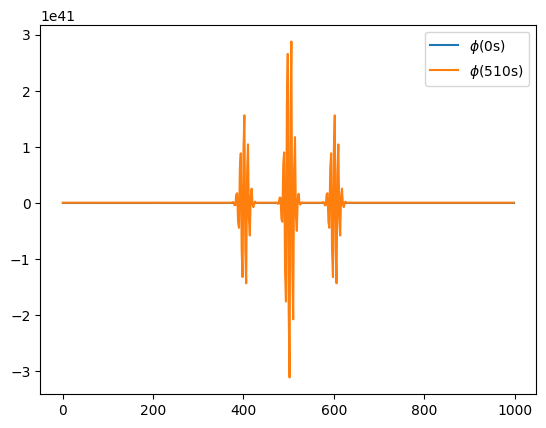

In [14]:
# c = u*dt/dx
# dc = 2.0*K*dt/dx**2

#consider again
def ftcsdiff(y0, c, dc):
    return dc*(np.roll(y0, -1) - 2*y0 + np.roll(y0, +1)) - 0.5*c*(np.roll(y0, -1) - np.roll(y0, +1)) + y0

def ctcsdiff(y0, y1, c, dc):
    return dc*(np.roll(y0, -1) - 2*y0 + np.roll(y0, +1)) - c*((np.roll(y1, -1)) - np.roll(y1, +1)) + y0

# filter
def RAWfilter(y0, y1, y2, alpha, beta):
    d = alpha*(y0 - 2*y1 + y2)
    return y1 + beta*d, y2 - (beta - 1)*d
def RAfilter(y0, y1, y2, alpha):
    d = alpha*(y0 - 2*y1 + y2)
    return y1 + d, y2

# loop
def run(x0, y0, u, dt, dx, k, alpha, beta, tinterval, tpoint, filter):
    t = 0
    c = u*dt/dx
    dc = 2.0*k*dt/dx**2
    # FTFS x FTBS CFL conditions
    # y1 = ftcsdiff(y0, c) if u < 0 else ftbs(y0, c)
    y1 = ftcsdiff(y0, c, dc) 
    plt.plot(x0, y0, label="$\phi$(" + str(int(np.floor(t))) + "s)")
    while t < tpoint:
        t = t + dt
        y2 = ctcsdiff(y0, y1, c, dc)
        if filter == "RAWfilter":
            y0, y1 = RAWfilter(y0, y1, y2, alpha, beta)
        else: y0, y1 = RAfilter(y0, y1, y2, alpha)
        if t % tinterval < dt:
            plt.plot(x0, y2, label="$\phi$(" + str(int(np.floor(t))) + "s)")
    plt.legend()
    plt.show()

dt = 30; k = 0.029; dx = 0.2; u = 0.95
tinterval = 500; duration = 2000
alpha = 0.1; beta = 0.53

run(x0, y0, u, dt, dx, k, alpha, beta, tinterval, tinterval, "RAfilter")
